# Experiment 4: Non Linear Regression

In [103]:
import pickle

import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [104]:
df = pd.read_csv("../../data/energy/df.csv", )
df.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
0,1054,32658,-16.064,-76.599,112.441,0.000,0.955,-0.296,35,28449.0,13.415,1,1
1,1054,32671,-16.208,-76.707,112.611,-0.719,0.415,0.558,24,28450.0,13.415,1,1
2,1053,32639,-16.064,-76.624,122.011,0.000,0.830,0.558,12,28450.0,13.415,1,1
3,1054,32670,-16.064,-76.624,112.611,0.000,0.830,0.558,54,28450.0,13.415,1,1
4,1054,32664,-15.968,-76.625,112.559,0.478,0.827,0.296,47,28451.0,13.415,1,1


In [105]:
df.describe()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
count,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,4.899060e+05,489906.000000,489906.0,489906.000000
mean,1048.735653,32496.026419,0.341670,-1.514543,119.205209,0.000912,-0.002101,-0.182805,26.056821,4.893892e+07,37.133466,1.0,3262.098839
std,592.666757,18372.661240,50.964521,62.401296,47.553276,0.582604,0.583274,0.535609,9.273521,2.905600e+07,24.312587,0.0,1937.060856
min,1.000000,1.000000,-94.627000,-115.600000,37.700000,-0.955000,-0.955000,-1.000000,1.000000,2.844900e+04,10.002000,1.0,1.000000
25%,537.000000,16622.000000,-44.772000,-58.113000,74.211000,-0.478000,-0.478000,-0.556000,23.000000,2.393785e+07,16.872000,1.0,1595.000000
50%,1056.000000,32727.000000,1.424000,-4.581000,121.789000,0.000000,-0.000000,-0.296000,26.000000,4.810140e+07,29.505000,1.0,3206.000000
75%,1562.000000,48398.750000,40.478000,48.480000,160.241000,0.478000,0.478000,0.296000,28.000000,7.434630e+07,52.643000,1.0,4956.000000
max,2070.000000,64170.000000,96.243000,105.024000,196.611000,0.955000,0.955000,0.558000,209.000000,9.998601e+07,99.947000,1.0,6665.000000


# HoldOut Set

In [144]:
np.random.seed(20)

remove_n = 20

drop_indices = np.random.choice(df.index, remove_n, replace=False)

hold_df = df.iloc[drop_indices]
df = df.drop(drop_indices)

# Define target and predictors

In [145]:
y = df['energy']

X = df[['pos_x', 'pos_y', 'pos_z', 'time']]

# Split Dataset 

Dataset needs to be split into:
1. Main
    1. Train
    2. Test

# Train/Test Split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=40)

print(" X TRAIN SHAPE: {} \n X TEST SHAPE: {} \n".format(X_train.shape, X_test.shape))
print(" Y TRAIN SHAPE: {} \n Y TEST SHAPE: {}".format(y_train.shape, y_test.shape))

 X TRAIN SHAPE: (323285, 4) 
 X TEST SHAPE: (166541, 4) 

 Y TRAIN SHAPE: (323285,) 
 Y TEST SHAPE: (166541,)


# Model 1: Decision Tree

In [147]:
dtree = DecisionTreeRegressor(max_depth=20,
                              min_samples_leaf=1,
                              random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=3)

# Model 1: Results

In [148]:
pred_train_tree = dtree.predict(X_train)
print("MSE: ", mean_squared_error(y_train, pred_train_tree))
print("R2: ", r2_score(y_train, pred_train_tree))

pred_test_tree = dtree.predict(X_test)
print("MSE: %.2f" % mean_squared_error(y_test, pred_test_tree))
print("R2: ", r2_score(y_test, pred_test_tree))

MSE:  76.27961641505568
R2:  0.871169497930669
MSE: 93.78
R2:  0.8408426853108655


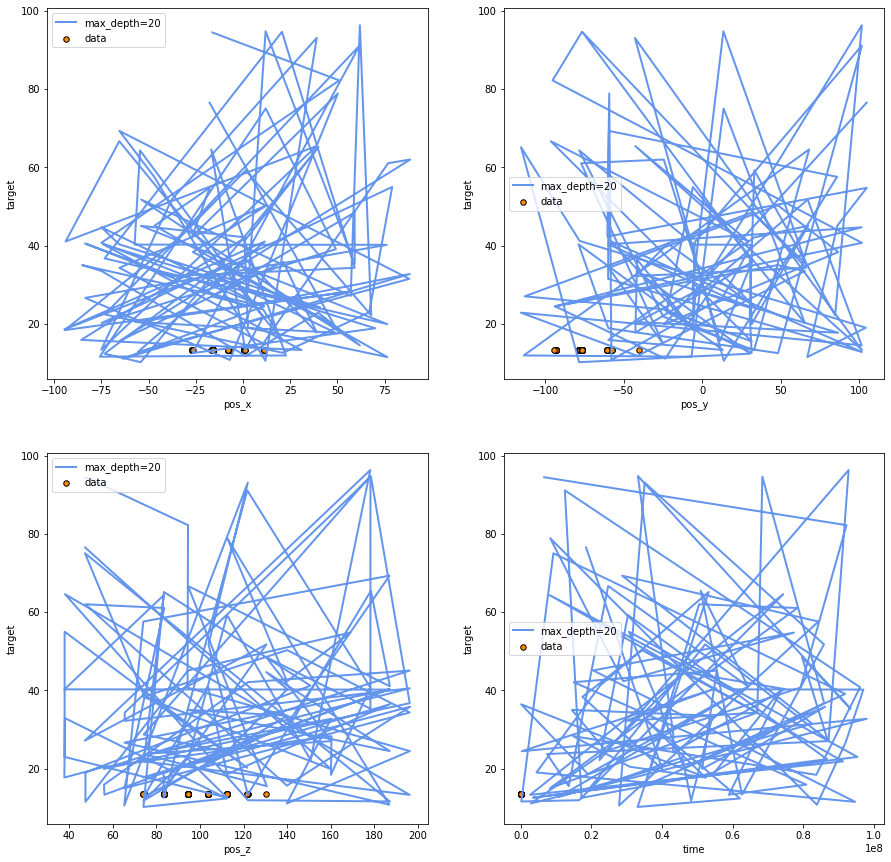

In [149]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

ax1.scatter(X.pos_x[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax1.plot(X_test.pos_x[:100], pred_test_tree[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax1.set_xlabel("pos_x")
ax1.set_ylabel("target")
ax1.legend()


ax2.scatter(X.pos_y[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax2.plot(X_test.pos_y[:100], pred_test_tree[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax2.set_xlabel("pos_y")
ax2.set_ylabel("target")
ax2.legend()


ax3.scatter(X.pos_z[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax3.plot(X_test.pos_z[:100], pred_test_tree[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax3.set_xlabel("pos_z")
ax3.set_ylabel("target")
ax3.legend()


ax4.scatter(X.time[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax4.plot(X_test.time[:100], pred_test_tree[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax4.set_xlabel("time")
ax4.set_ylabel("target")
ax4.legend()

plt.savefig("../../assets/energy/decision_tree.jpg", dpi=600, bbox_inches = "tight")

# Save Model

In [150]:
filename = 'dtree_model.sav'
pickle.dump(dtree, open(filename, 'wb'))

# Test on Unseen Data

In [151]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8408426853108655


In [152]:
Xnew = hold_df[['pos_x',
               'pos_y',
               'pos_z',
               'time']]
hold_y = hold_df['energy']

ynew = loaded_model.predict(Xnew)

In [153]:
ynew

array([15.283     , 15.099     , 14.9938209 , 59.859     , 55.431     ,
       51.75263736, 34.32055058, 67.943     , 11.327     , 14.41084545,
       23.54001408, 10.52      , 59.239     , 24.21654882, 51.75263736,
       12.083     , 76.529     , 35.50122807, 12.382     , 34.32055058])

In [154]:
hold_y

256313    15.283
178710    15.099
195290    12.876
489475    59.859
72808     55.431
263796    55.206
353763    39.958
85214     67.943
45298     11.327
440526    14.463
54838     12.624
201723    10.520
161794    59.239
227968    19.609
263669    55.206
13710     12.083
93209     76.529
253697    23.063
76863     12.382
349317    37.730
Name: energy, dtype: float64

In [155]:
print("MSE: ", mean_squared_error(hold_y, ynew))
print("R2: ", r2_score(hold_y, ynew))

MSE:  18.34214404286869
R2:  0.9633070162164927


# Model2: Random Forest (Bootstrap Aggregation)

In [63]:
model_rf = RandomForestRegressor(n_estimators=30,
                                 oob_score=True,
                                 random_state=100,
                                 verbose=2)

model_rf.fit(X_train, y_train) 

pred_train_rf = model_rf.predict(X_train)

print("MSE: ", mean_squared_error(y_train,pred_train_rf))
print("R2: ", r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print("MSE: ", mean_squared_error(y_test,pred_test_rf))
print("R2: ", r2_score(y_test, pred_test_rf))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 30


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   54.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


MSE:  2.5926876138497605
R2:  0.9956152077935156
MSE:  15.932319499975232
R2:  0.9730303172713205


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.4s finished


# Model2: Results

In [64]:
model_rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished


0.9730303172713205

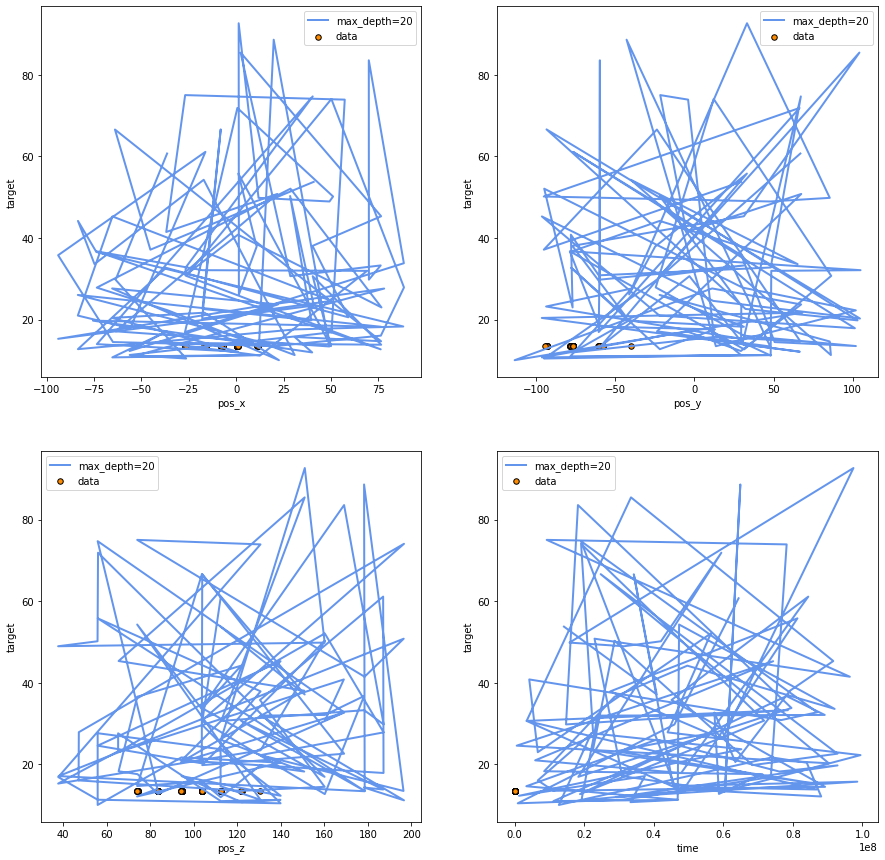

In [65]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

ax1.scatter(X.pos_x[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax1.plot(X_test.pos_x[:100], pred_test_rf[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax1.set_xlabel("pos_x")
ax1.set_ylabel("target")
ax1.legend()


ax2.scatter(X.pos_y[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax2.plot(X_test.pos_y[:100], pred_test_rf[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax2.set_xlabel("pos_y")
ax2.set_ylabel("target")
ax2.legend()


ax3.scatter(X.pos_z[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax3.plot(X_test.pos_z[:100], pred_test_rf[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax3.set_xlabel("pos_z")
ax3.set_ylabel("target")
ax3.legend()


ax4.scatter(X.time[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax4.plot(X_test.time[:100], pred_test_rf[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax4.set_xlabel("time")
ax4.set_ylabel("target")
ax4.legend()

plt.savefig("../../assets/energy/random_forest.jpg", dpi=600, bbox_inches = "tight")

# Save Model

In [66]:
filename = 'rf_model.sav'
pickle.dump(model_rf, open(filename, 'wb'))

# Unseen Data

In [67]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9730303172713205


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.5s finished


In [69]:
Xnew = hold_df[['pos_x',
               'pos_y',
               'pos_z',
               'time']]
hold_y = hold_df['energy']

ynew = loaded_model.predict(Xnew)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [70]:
ynew

array([20.061     , 24.873     , 14.403     , 12.908     , 42.506     ,
       11.635     , 14.601     , 17.22153333, 20.061     , 67.561     ,
       11.78      , 27.01646667, 30.629     , 62.514     , 15.06473333,
       28.93253333, 12.263     , 57.58      , 23.19676667, 43.99843333])

In [71]:
hold_y

358818    20.061
159680    24.873
222390    14.403
437957    12.872
13266     42.506
101351    11.635
38050     14.601
28437     17.104
358728    20.061
327353    67.561
468183    11.780
20031     28.233
17630     30.629
200148    62.514
458203    14.684
246550    66.896
204478    12.263
413972    57.580
204884    21.426
439503    56.253
Name: energy, dtype: float64

In [72]:
print('Mean squared error: %.2f'
      % mean_squared_error(hold_y, ynew))

print('Coefficient of determination: %.2f'
      % r2_score(hold_y, ynew))

Mean squared error: 79.81
Coefficient of determination: 0.80
